### Analysis of Ar39 aggregation (multiple event over the same time window)
In this notebook, we analyse the result of aggregation of multiple Ar39 events (from 1 to 4) over the same time window `T=100ns`.
Parameters:
- Integration time `Dt=4ns`, according to the FlashADC frequency
- Time window `T=100ns`, as overestimation of most of muon background. Note: this is just an example, we should consider `T` w.r.t. the events we are looking for (*i.e. Ar41 de-excitations occur in which tau?*)
- Number of multiple Ar39 `Grp=1,2,3,4`. More than this number present a negligible probability.

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

In [3]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Development", "Out")
prefix_1Ar39_files = "Ar39_Snapshots_T100_DT4_Grp1_Seed123456789_Part1.csv"
prefix_2Ar39_files = "Ar39_Snapshots_T100_DT4_Grp2_Seed123456789_Part1.csv"
prefix_3Ar39_files = "Ar39_Snapshots_T100_DT4_Grp3_Seed123456789_Part1.csv"
prefix_4Ar39_files = "Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv"

df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
df2 = load_dataframe_from_files(dirin, prefix_2Ar39_files)
df3 = load_dataframe_from_files(dirin, prefix_3Ar39_files)
df4 = load_dataframe_from_files(dirin, prefix_4Ar39_files)

print("[Info] Loaded datasets")
print("[Info] 1 Ar39: {} events".format(df1.eventnumber.nunique()))
print("[Info] 2 Ar39: {} events".format(df2.eventnumber.nunique()))
print("[Info] 3 Ar39: {} events".format(df3.eventnumber.nunique()))
print("[Info] 4 Ar39: {} events".format(df4.eventnumber.nunique()))

[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp1_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp2_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp3_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv
[Info] Loaded datasets
[Info] 1 Ar39: 100000 events
[Info] 2 Ar39: 100000 events
[Info] 3 Ar39: 100000 events
[Info] 4 Ar39: 100000 events


In [7]:
groupby_event_df1 = df1.groupby("eventnumber").sum()
groupby_event_df2 = df2.groupby("eventnumber").sum()
groupby_event_df3 = df3.groupby("eventnumber").sum()
groupby_event_df4 = df4.groupby("eventnumber").sum()

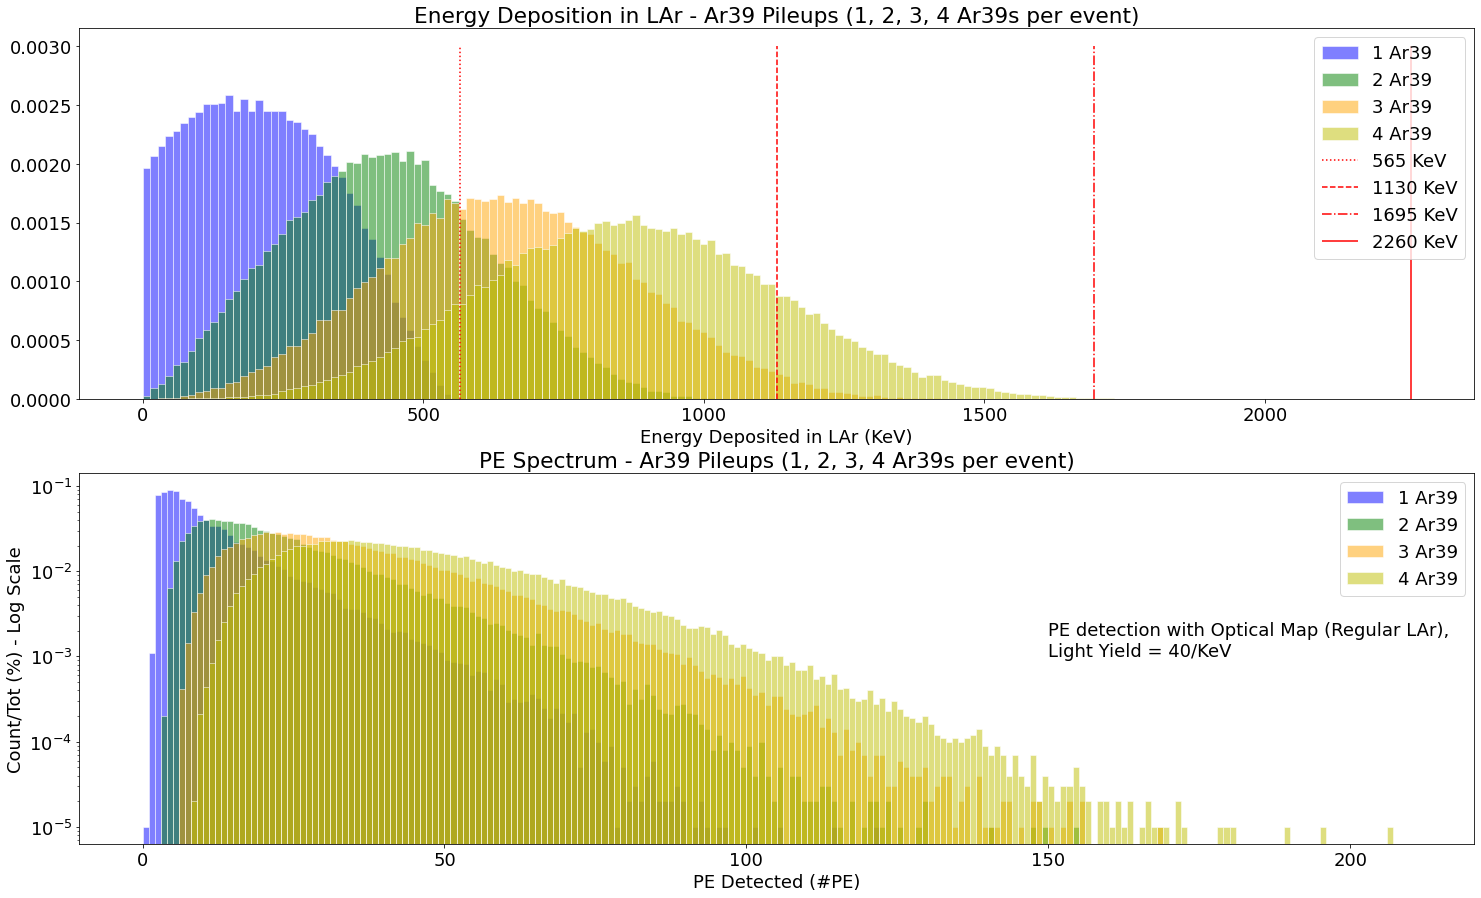

In [45]:
alpha=0.5
ar39_max_energy = 565

plt.subplot(2,1,1)
plt.title("Energy Deposition in LAr - Ar39 Pileups (1, 2, 3, 4 Ar39s per event)")
bins = np.linspace(0, 2000, 150)
plt.hist(groupby_event_df1.energydeposition, bins=bins, label="1 Ar39", density=True, color='b', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df2.energydeposition, bins=bins, label="2 Ar39", density=True, color='g', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.energydeposition, bins=bins, label="3 Ar39", density=True, color='orange', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df4.energydeposition, bins=bins, label="4 Ar39", density=True, color='y', edgecolor='w', alpha=alpha)
plt.vlines(x=1 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dotted', label="{} KeV".format(ar39_max_energy))
plt.vlines(x=2 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dashed', label="{} KeV".format(2*ar39_max_energy))
plt.vlines(x=3 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dashdot', label="{} KeV".format(3*ar39_max_energy))
plt.vlines(x=4 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='solid', label="{} KeV".format(4*ar39_max_energy))
plt.xlabel("Energy Deposited in LAr (KeV)")
plt.legend()

plt.subplot(2,1,2)
bins = np.linspace(0, 210, 211)
plt.hist(groupby_event_df1.pedetected, bins=bins, label="1 Ar39", density=True, color='b', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df2.pedetected, bins=bins, label="2 Ar39", density=True, color='g', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, color='orange', edgecolor='w', alpha=alpha)
plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, color='y', edgecolor='w', alpha=alpha)
plt.title("PE Spectrum - Ar39 Pileups (1, 2, 3, 4 Ar39s per event)")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.text(150, 0.001, "PE detection with Optical Map (Regular LAr),\nLight Yield = 40/KeV")
plt.legend()
plt.show()

In [96]:
std_event_df1 = groupby_event_df1.apply(lambda row: np.std(np.min([np.nonzero([row[2:]])[1], 72-np.nonzero([row[2:]])[1]], axis=0)), axis=1)
std_event_df2 = groupby_event_df2.apply(lambda row: np.std(np.min([np.nonzero([row[2:]])[1], 72-np.nonzero([row[2:]])[1]], axis=0)), axis=1)
std_event_df3 = groupby_event_df3.apply(lambda row: np.std(np.min([np.nonzero([row[2:]])[1], 72-np.nonzero([row[2:]])[1]], axis=0)), axis=1)
std_event_df4 = groupby_event_df4.apply(lambda row: np.std(np.min([np.nonzero([row[2:]])[1], 72-np.nonzero([row[2:]])[1]], axis=0)), axis=1)


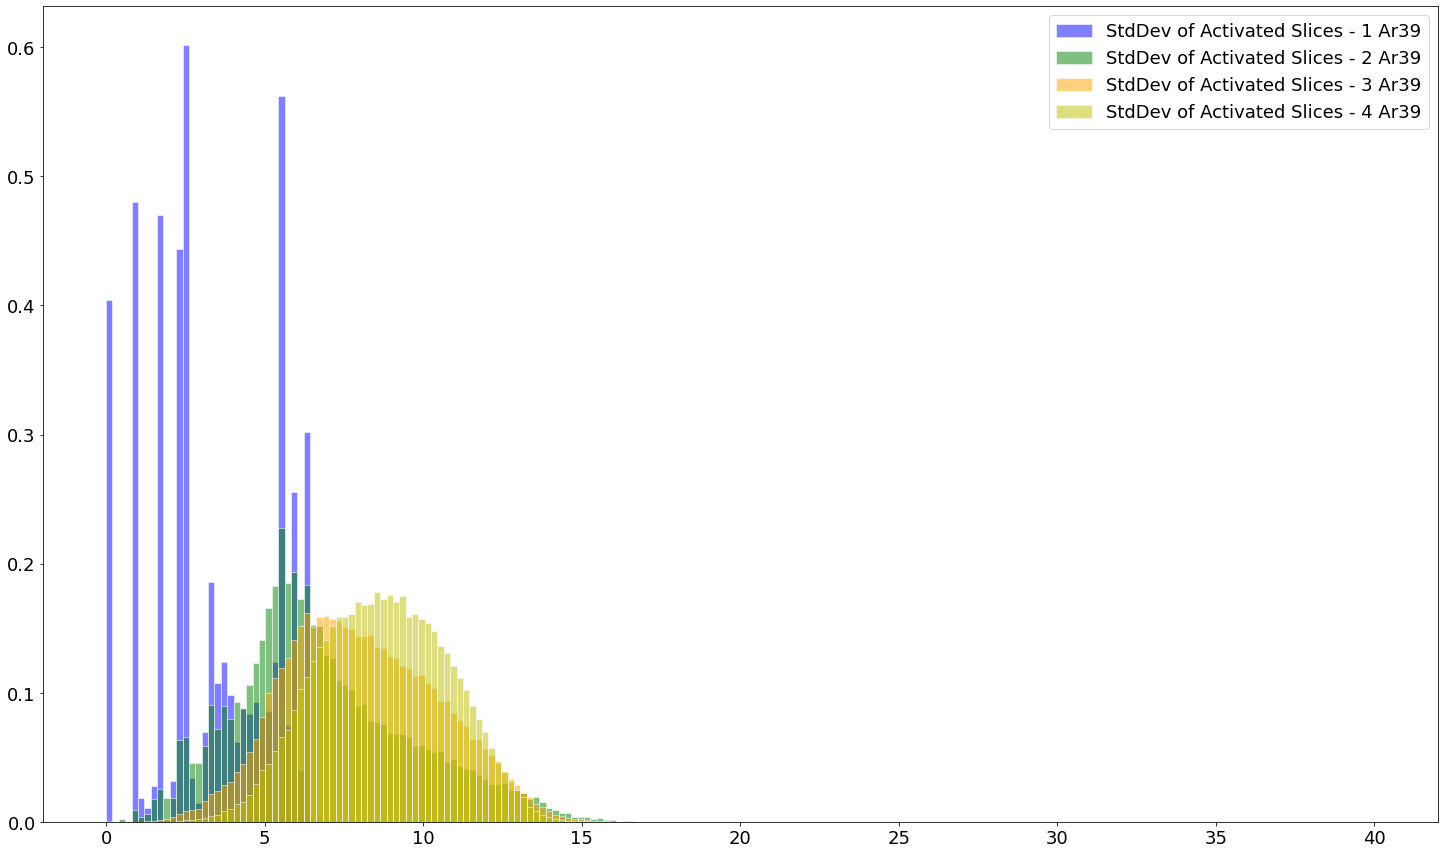

In [101]:
bins = np.linspace(0, 40, 200)
plt.hist(std_event_df1, bins=bins, label="StdDev of Activated Slices - 1 Ar39", density=True, color='b', edgecolor='w', alpha=0.5)
plt.hist(std_event_df2, bins=bins, label="StdDev of Activated Slices - 2 Ar39", density=True, color='g', edgecolor='w', alpha=0.5)
plt.hist(std_event_df3, bins=bins, label="StdDev of Activated Slices - 3 Ar39", density=True, color='orange', edgecolor='w', alpha=0.5)
plt.hist(std_event_df4, bins=bins, label="StdDev of Activated Slices - 4 Ar39", density=True, color='y', edgecolor='w', alpha=0.5)
plt.legend()
plt.show()

In [63]:
std_event_df4.describe()

count    172991.000000
mean         17.438317
std           5.229154
min           2.291288
25%          13.558944
50%          17.507006
75%          21.375778
max          32.522108
dtype: float64

In [73]:
np.min([np.nonzero([groupby_event_df4.iloc[1, 2:]])[1], 72-np.nonzero([groupby_event_df4.iloc[1, 2:]])[1]], axis=0)

array([ 5,  8,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 34, 35, 35, 33, 32, 31, 30, 29, 28, 27, 26,
        4])

In [66]:
np.nonzero([groupby_event_df4.iloc[1, 2:]])[1]

array([ 5,  8,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46,
       68])

In [67]:
72-np.nonzero([groupby_event_df4.iloc[1, 2:]])[1]

array([67, 64, 63, 62, 61, 60, 58, 57, 56, 54, 53, 52, 51, 50, 49, 48, 47,
       46, 45, 44, 43, 42, 41, 38, 37, 35, 33, 32, 31, 30, 29, 28, 27, 26,
        4])

In [93]:
np.min([np.nonzero([groupby_event_df4.iloc[1, 2:]])[1], 72-np.nonzero([groupby_event_df4.iloc[1, 2:]])[1]], axis=0)

array([ 5,  8,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 34, 35, 35, 33, 32, 31, 30, 29, 28, 27, 26,
        4])

array([67, 64, 63, 62, 61, 60, 58, 57, 56, 54, 53, 52, 51, 50, 49, 48, 47,
       46, 45, 44, 43, 42, 41, 38, 37, 35, 33, 32, 31, 30, 29, 28, 27, 26,
        4])

In [94]:
np.std(np.min([np.nonzero([groupby_event_df4.iloc[1, 2:]])[1], 72-np.nonzero([groupby_event_df4.iloc[1, 2:]])[1]], axis=0))

8.900630566976472